In [121]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

In [122]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [123]:
digits.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

<Figure size 640x480 with 0 Axes>

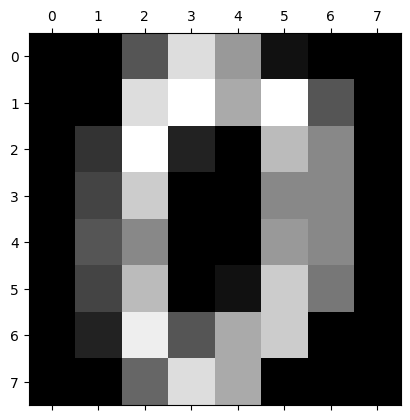

In [124]:
plt.gray()
plt.matshow(digits.images[0])

In [125]:
df = pd.DataFrame(digits.data)

In [126]:
df['target'] = digits.target

In [127]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis="columns"), digits.target, test_size=0.2)

In [129]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=35)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=35)

In [130]:
model.score(X_test,y_test)

0.9805555555555555

In [131]:
y_predicted = model.predict(X_test)

In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 39,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 32]])

Text(95.72222222222221, 0.5, 'Truth')

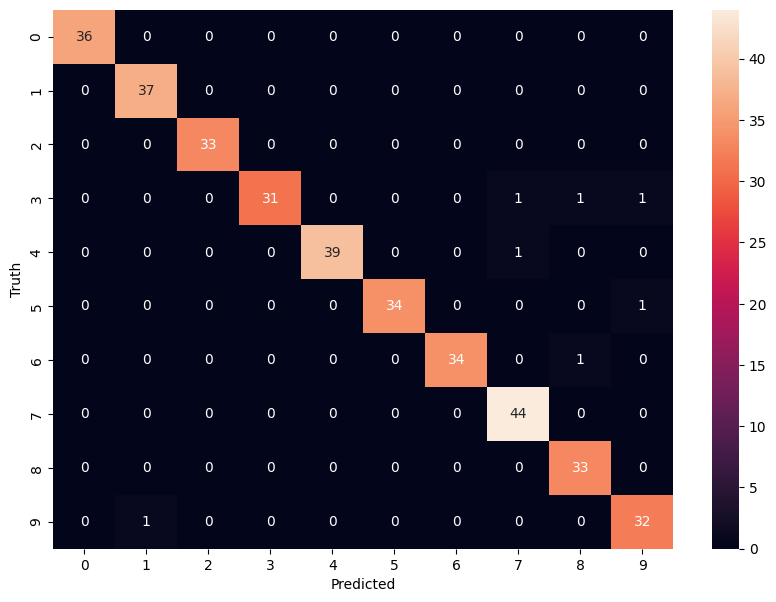

In [134]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')